# Task 3
    REPOSITORY: datafun-07-ml-predictive
    NOTEBOOK FILE: Task_03.ipynb
    NAME: Kristen Finley
    DATE: 28Feb2023

## Section 10.16: Best-fit Line (Supervised Learning) Method

In [1]:
import pandas as pd

### Linear Relationships: Uses pandas DataFrames to plot Celsius vs Fahrenheit 

In [2]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

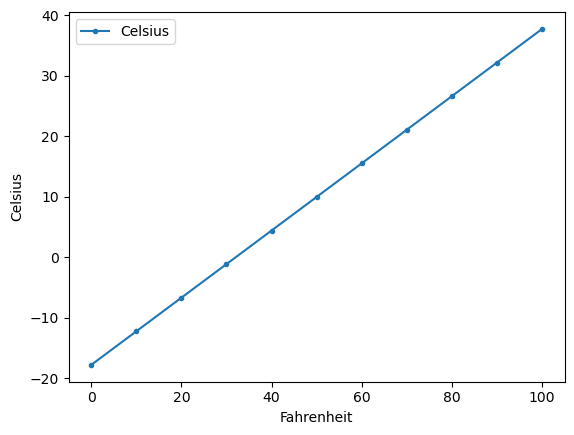

In [3]:
temps_df = pd.DataFrame(temps, columns = ['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x = 'Fahrenheit', y = 'Celsius', style = '.-')
y_label = axes.set_ylabel('Celsius')

### Loads .csv file into a DataFrame

In [4]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Displays DataFrame's head and tail

In [5]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [6]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Cleans the Data

Renames 'Value' as 'Temperature' for readability

In [7]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


Checks the column's type

In [8]:
nyc.Date.dtype

dtype('int64')

Truncates the last 2 digits

In [9]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Describes Data

Calculates basic descriptive statistics for the dataset

In [10]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

---

#### There are 124 temperature observations in the range of 26.1 to 47.60 degF, averaging at 37.60 degF.

---
### Forcasts future January Averagge High Temperatures

In [11]:
from scipy import stats 

Uses Linear Regression to calculate slope and y-intercept

In [12]:
linear_regression = stats.linregress(x = nyc.Date, y = nyc.Temperature)

In [13]:
linear_regression.slope

0.014771361132966163

In [14]:
linear_regression.intercept

8.694993233674289

### Uses results to predict the "average high temp in Jan" for the year 2026

In [15]:
predicting = (lambda x: linear_regression.slope* x + linear_regression.intercept)
predicting(2026)

38.62177088906374

### Plots Average High Temperatures and Regression Line

In [16]:
import seaborn as sns

(10.0, 70.0)

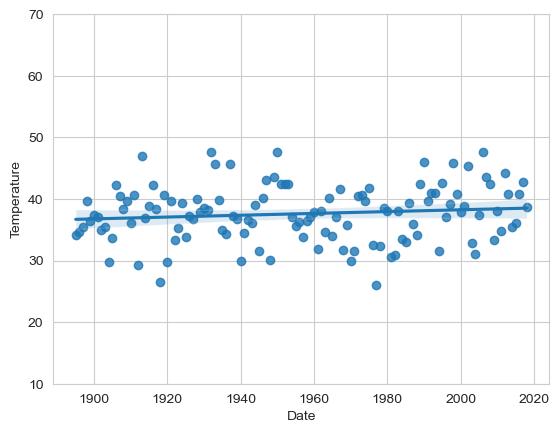

In [17]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

## Section 15.4 Scikit-learn Estimator Method

### Splits Data for Training and Testing

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), 
    nyc.Temperature.values, random_state = 11)

In [19]:
X_train.shape

(93, 1)

In [20]:
X_test.shape

(31, 1)

### Trains the Model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linear_reg = LinearRegression()
linear_reg.fit(X=X_train, y=y_train)

LinearRegression()

In [23]:
linear_reg.coef_

array([0.01939167])

In [24]:
linear_reg.intercept_

-0.30779820252658396

### Tests the Model

In [25]:
predicted = linear_reg.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected {e:.2f}')

predicted: 37.86, expected 31.70
predicted: 38.69, expected 34.80
predicted: 37.00, expected 39.40
predicted: 37.25, expected 45.70
predicted: 38.05, expected 32.30
predicted: 37.64, expected 33.80
predicted: 36.94, expected 39.70


### Predicts Future Temperatures and Estimates Past Temperatures

In [26]:
predict = (lambda x: linear_reg.coef_* x + linear_reg.intercept_)

In [27]:
predict(2019)

array([38.84399018])

In [28]:
predict(1890)

array([36.34246432])

In [29]:
predict(2026)

array([38.97973189])

### Visualizes the Datase with the Regression Line

In [30]:
import numpy as np

In [31]:
import matplotlib.pyplot as plt

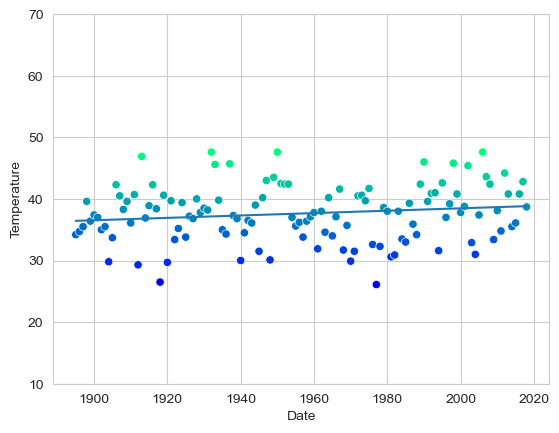

In [32]:
axes = sns.scatterplot(data = nyc, x = 'Date', y = 'Temperature', hue = 'Temperature', palette = 'winter', legend = False)
axes.set_ylim(10, 70)
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
line = plt.plot(x, y)

## Method Comparison

In [33]:
per_rd = 100 * (predict(2026)-predicting(2026))/predict(2026)
per_rd.round(decimals = 1)

array([0.9])

Section 10.4 used the slope and intercept of the best-fit line for a time series estimate.
    2026 Temperature Prediction: 38.62177

Section 15.4 used scikit-learn estimator and splitting data for training (to build a model) and testing (testing our model against known values) for a time series estimate. 
    2026 Temperature Prediction: 38.97973

The models gave similar results with a percent relative difference < 1%.